In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Load the data
df = pd.read_csv("/content/sample_data/data (1).csv")

In [ ]:
df.head(3)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",Yorker trackpants made from 100% rich combed c...,66% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              30000 non-null  object 
 1   actual_price     29137 non-null  object 
 2   average_rating   27554 non-null  float64
 3   brand            27932 non-null  object 
 4   category         30000 non-null  object 
 5   crawled_at       30000 non-null  object 
 6   description      18017 non-null  object 
 7   discount         29059 non-null  object 
 8   images           30000 non-null  object 
 9   out_of_stock     30000 non-null  bool   
 10  pid              30000 non-null  object 
 11  product_details  30000 non-null  object 
 12  seller           28259 non-null  object 
 13  selling_price    29998 non-null  object 
 14  sub_category     30000 non-null  object 
 15  title            30000 non-null  object 
 16  url              30000 non-null  object 
dtypes: bool(1), 

In [ ]:
df['selling_price']

0          921
1          499
2          931
3          911
4          943
         ...  
29995    1,379
29996      520
29997    2,999
29998    1,875
29999    1,875
Name: selling_price, Length: 30000, dtype: object

In [ ]:
df.isnull().sum()

_id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description        11983
discount             941
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [ ]:
df.nunique()

_id                30000
actual_price         728
average_rating        38
brand                324
category               4
crawled_at         17188
description         5192
discount              87
images             24146
out_of_stock           2
pid                28080
product_details    26783
seller               534
selling_price       1512
sub_category          24
title               4579
url                30000
dtype: int64

In [ ]:
# Handle missing values
df['brand'].fillna('Unknown', inplace=True)
df['seller'].fillna('Unknown', inplace=True)
df['description'].fillna('N/a', inplace=True)
df['discount'].fillna('0% off', inplace=True)
df['average_rating'].fillna(df['average_rating'].mean(), inplace=True)

In [ ]:
# Drop unnecessary columns
df.drop(columns=['url', 'images', '_id', 'description', 'pid', 'product_details'], inplace=True)

In [ ]:
df=df.dropna(subset=['actual_price', 'selling_price'])

In [ ]:
df.isnull().sum()

actual_price      0
average_rating    0
brand             0
category          0
crawled_at        0
discount          0
out_of_stock      0
seller            0
selling_price     0
sub_category      0
title             0
dtype: int64

In [ ]:
df.shape

(29137, 11)

In [ ]:
# Categorize discount levels
def categorize_discount(discount):
    if discount == '0% off':
        return 'No Discount'
    discount_value = int(discount.strip('% off'))
    if discount_value <= 10:
        return 'Low Discount'
    elif discount_value <= 30:
        return 'Medium Discount'
    else:
        return 'High Discount'

df['discount_level'] = df['discount'].apply(categorize_discount)

In [ ]:
print(df.columns)


Index(['actual_price', 'average_rating', 'brand', 'category', 'crawled_at',
       'discount', 'out_of_stock', 'seller', 'selling_price', 'sub_category',
       'title', 'discount_level'],
      dtype='object')


In [ ]:
# Convert 'crawled_at' column to datetime format
df['crawled_at'] = pd.to_datetime(df['crawled_at'], format='%m/%d/%Y, %H:%M:%S')

In [ ]:
# Extract month from 'crawled_at' and create a new column 'month'
df['month'] = df['crawled_at'].dt.to_period('M')


object


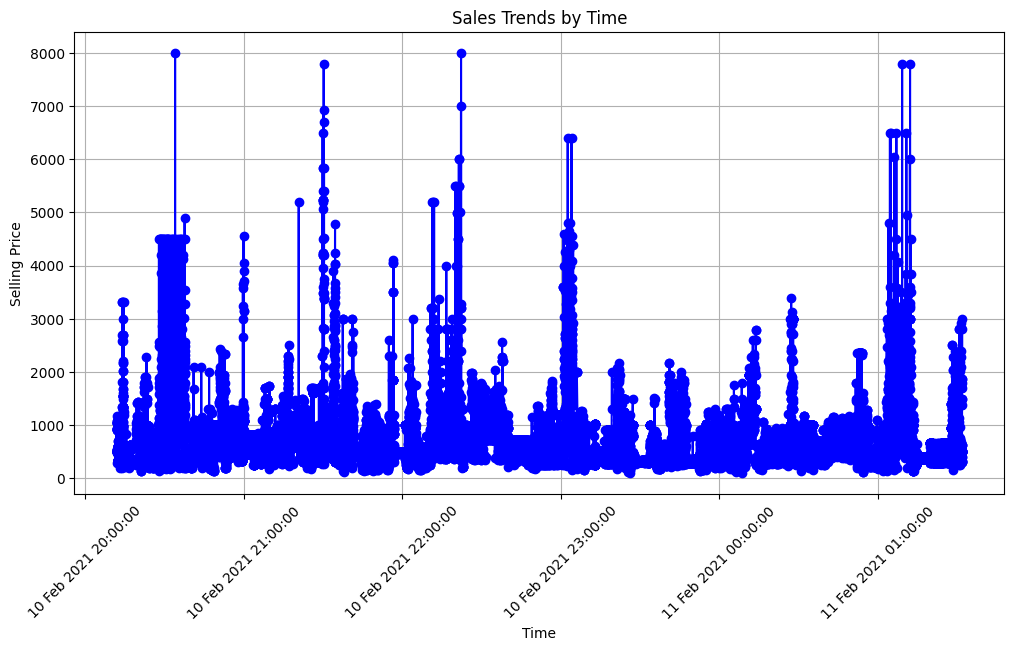

In [ ]:
from datetime import datetime
from matplotlib.dates import DateFormatter

df['crawled_at'] = pd.to_datetime(df['crawled_at'], format='%d/%m/%Y %H:%M:%S')
print(df['selling_price'].dtype)
df['selling_price'] = df['selling_price'].astype(str).str.replace(',', '')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['hour'] = df['crawled_at'].dt.hour
df['minute'] = df['crawled_at'].dt.minute
plt.figure(figsize=(12, 6))
plt.plot(df['crawled_at'], df['selling_price'], marker='o', linestyle='-', color='b')
plt.title('Sales Trends by Time')
plt.xlabel('Time')
plt.ylabel('Selling Price')
date_format = DateFormatter("%d %b %Y %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Calculate statistics
discounted_counts = len(df[df['discount'] != '0% off'])
non_discounted_counts = len(df[df['discount'] == '0% off'])
conversion_rate_discounted = len(df[(df['discount'] != '0% off') & (df['out_of_stock'] == False)]) / discounted_counts
conversion_rate_non_discounted = len(df[(df['discount'] == '0% off') & (df['out_of_stock'] == False)]) / non_discounted_counts
avg_order_value_discounted = df[df['discount'] != '0% off']['selling_price'].mean()
avg_order_value_non_discounted = df[df['discount'] == '0% off']['selling_price'].mean()


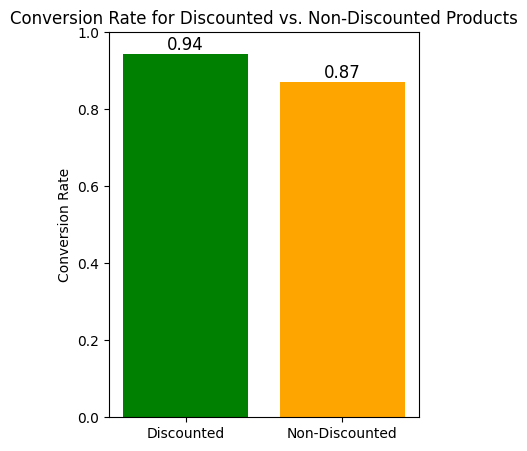

In [ ]:
# Conversion Rate Visualization with Legends
plt.figure(figsize=(4, 5))
bars = plt.bar(['Discounted', 'Non-Discounted'], [conversion_rate_discounted, conversion_rate_non_discounted], color=['green', 'orange'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate for Discounted vs. Non-Discounted Products')
plt.ylim(0, 1)

# Add Legends with Percentage Values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


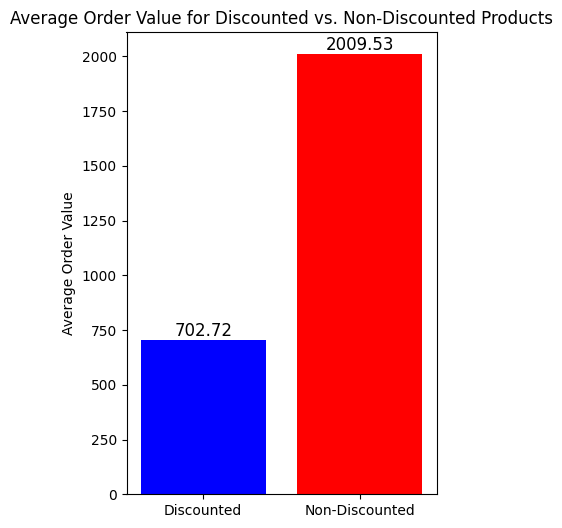

In [ ]:
# Average Order Value Visualization with Average Values Displayed on Bars
plt.figure(figsize=(4, 6))
bars = plt.bar(['Discounted', 'Non-Discounted'], [avg_order_value_discounted, avg_order_value_non_discounted], color=['blue', 'red'])
plt.ylabel('Average Order Value')
plt.title('Average Order Value for Discounted vs. Non-Discounted Products')

# Add Average Values on Top of Bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


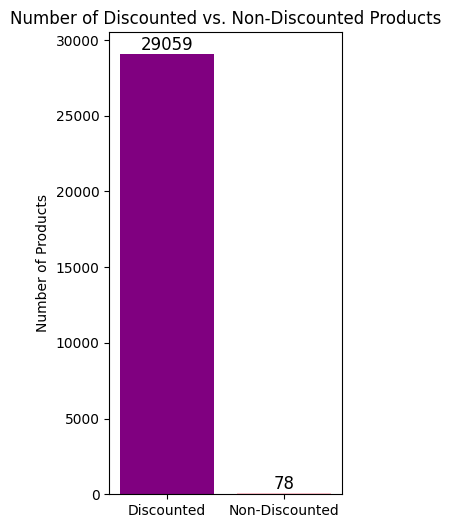

In [ ]:
# Number of Products Visualization with Numbers Displayed on Bars
plt.figure(figsize=(3, 6))
bars = plt.bar(['Discounted', 'Non-Discounted'], [discounted_counts, non_discounted_counts], color=['purple', 'pink'])
plt.ylabel('Number of Products')
plt.title('Number of Discounted vs. Non-Discounted Products')

# Add Numbers on Top of Bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=12)

plt.show()


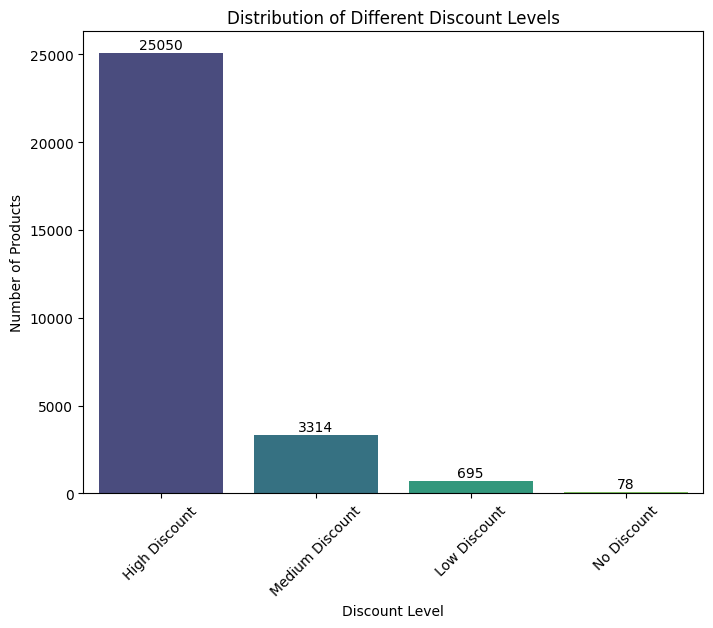

In [ ]:
# Count the occurrences of each discount level
discount_level_counts = df['discount_level'].value_counts()
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=discount_level_counts.index, y=discount_level_counts.values, palette="viridis")
# Add data labels (count) on top of the bars
for index, value in enumerate(discount_level_counts.values):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')
# Add labels and title
plt.xlabel('Discount Level')
plt.ylabel('Number of Products')
plt.title('Distribution of Different Discount Levels')
# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
df['actual_price'] = df['actual_price'].str.replace(',', '').astype(float)
df['discount'] = df['discount'].str.rstrip('% off').astype('float')

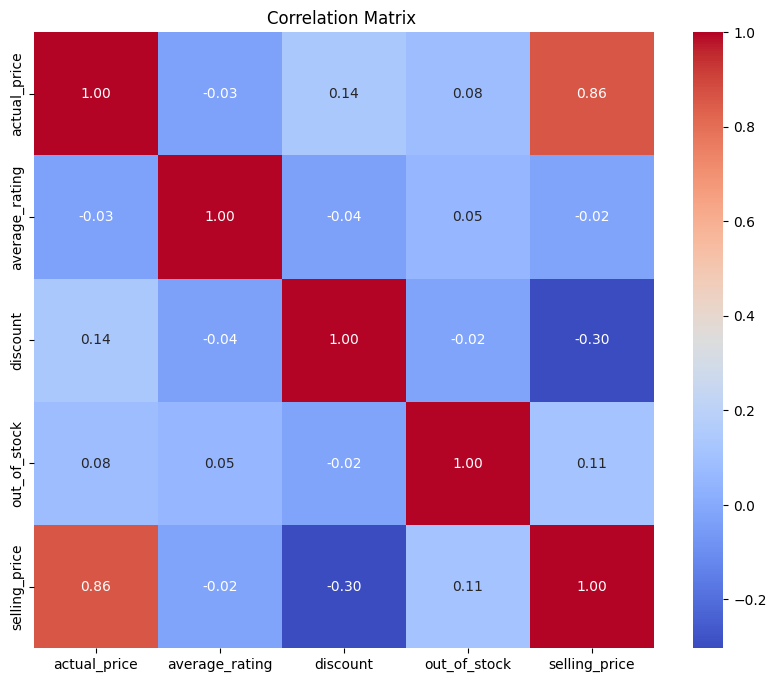

In [ ]:
correlation_matrix = df.drop(columns=['minute', 'hour']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix ')
plt.show()

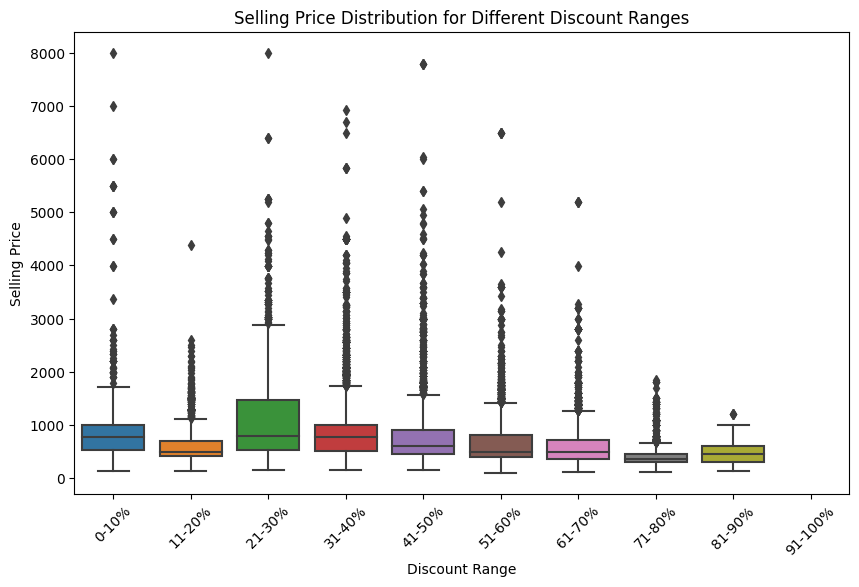

In [ ]:
# Define discount ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']

# Create a new column 'discount_range' by grouping 'discount' into predefined bins
df['discount_range'] = pd.cut(df['discount'], bins=bins, labels=labels, right=False)

# Create the box plot using the grouped discount ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='discount_range', y='selling_price', data=df)
plt.title('Selling Price Distribution for Different Discount Ranges')
plt.xlabel('Discount Range')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import f_oneway
discount_ranges = df['discount_range'].unique()
groups = [df[df['discount_range'] == range]['selling_price'] for range in discount_ranges]

In [ ]:
# Example: Creating a dictionary of discount ranges and corresponding selling prices
discount_range_groups = {}
for range in discount_ranges:
    selling_prices = df[df['discount_range'] == range]['selling_price']
    discount_range_groups[range] = list(selling_prices)

# Convert the dictionary to a DataFrame
discount_range_df = pd.DataFrame(discount_range_groups.items(), columns=['Discount Range', 'Selling Prices'])

# Display the new DataFrame
discount_range_df

,Discount Range,Selling Prices
0,61-70%,"[921, 499, 931, 911, 943, 466, 545, 489, 531, ..."
1,71-80%,"[1169, 1074, 531, 531, 1074, 521, 531, 511, 10..."
2,41-50%,"[911, 911, 921, 297, 297, 297, 297, 297, 297, ..."
3,21-30%,"[280, 777, 2699, 3311, 3311, 2591, 2591, 2699,..."
4,81-90%,"[499, 599, 499, 499, 599, 499, 599, 599, 539, ..."
5,51-60%,"[699, 196, 289, 289, 289, 289, 289, 196, 986, ..."
6,31-40%,"[289, 289, 1339, 1808, 1674, 1674, 1540, 1540,..."
7,11-20%,"[550, 1529, 2069, 1153, 449, 535, 490, 490, 53..."
8,0-10%,"[379, 474, 379, 474, 379, 455, 427, 379, 720, ..."


In [ ]:
f_stat, p_value = f_oneway(*groups)

print(f'F-statistic: {f_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print("There is a significant difference in sales between different discount ranges.")
else:
    print("There is no significant difference in sales between different discount ranges.")

F-statistic: 497.72
P-value: 0.0000
There is a significant difference in sales between different discount ranges.


In [ ]:
df

,actual_price,average_rating,brand,category,crawled_at,discount,out_of_stock,seller,selling_price,sub_category,title,discount_level,month,hour,minute,discount_range
0,2999.0,3.900000,York,Clothing and Accessories,2021-02-10 20:11:51,69.0,False,Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,High Discount,2021-02,20,11,61-70%
1,1499.0,3.900000,York,Clothing and Accessories,2021-02-10 20:11:52,66.0,False,Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,High Discount,2021-02,20,11,61-70%
2,2999.0,3.900000,York,Clothing and Accessories,2021-02-10 20:11:52,68.0,False,Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,High Discount,2021-02,20,11,61-70%
3,2999.0,3.900000,York,Clothing and Accessories,2021-02-10 20:11:53,69.0,False,Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,High Discount,2021-02,20,11,61-70%
4,2999.0,3.900000,York,Clothing and Accessories,2021-02-10 20:11:53,68.0,False,Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",High Discount,2021-02,20,11,61-70%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2299.0,3.641972,Oka,Clothing and Accessories,2021-02-11 01:31:54,40.0,True,Unknown,1379,Winter Wear,Sleeveless Solid Men Jacket,High Discount,2021-02,1,31,41-50%
29996,799.0,3.800000,Oka,Clothing and Accessories,2021-02-11 01:31:54,34.0,False,OKANE,520,Bottomwear,Printed Men Blue Regular Shorts,High Discount,2021-02,1,31,31-40%
29997,4999.0,3.641972,Oka,Clothing and Accessories,2021-02-11 01:31:54,40.0,True,Unknown,2999,"Blazers, Waistcoats and Suits",Checkered Single Breasted Casual Men Full Slee...,High Discount,2021-02,1,31,41-50%
29998,3125.0,3.800000,Oka,Clothing and Accessories,2021-02-11 01:31:55,40.0,False,OKANE,1875,Winter Wear,Full Sleeve Solid Men Casual Jacket,High Discount,2021-02,1,31,41-50%


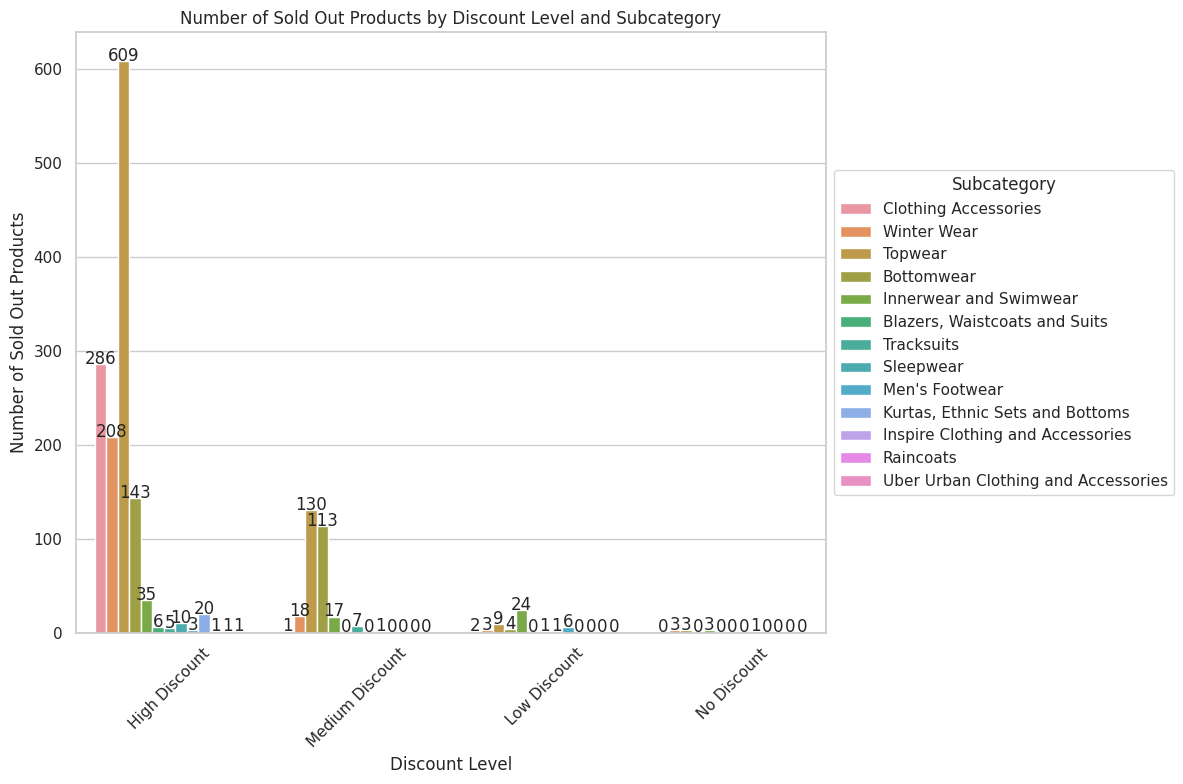

In [ ]:

# Set the style of the plot
sns.set(style="whitegrid")

# Create a count plot for discount levels and subcategories with sold-out products
plt.figure(figsize=(12, 8))
sns.countplot(x='discount_level', hue='sub_category', data=df[df['out_of_stock'] == True])

# Display the count values on top of the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

plt.xlabel('Discount Level')
plt.ylabel('Number of Sold Out Products')
plt.title('Number of Sold Out Products by Discount Level and Subcategory')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Subcategory', title_fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
